# Credit Risk (loan default) Analysis

## Introduction
This Notebook demonstrates a predictive modeling workflow for credit risk (loan default) analysis. The objective is to use customer and loan features to predict whether a loan applicant is likely to default. Such analysis is common in banking. microfinance, and finetech.

## Data Source
**Dataset:** Kaggle Credit Risk Database Features: Person Age, Person Income, Person Home Ownership, Person Employment Length, Loan Intent, Loan Grade, Loan Amount, Loan Interest Rate, Loan Status, Loan Percent Income, CB Person Default On File, CB Person Cred Hist Length

In [7]:
import pandas as pd

df = pd.read_csv('credit_risk_dataset.csv')
print(df.shape)
display(df.head())
print(df.columns)

(32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


## Data Cleaning
We clean the data by:
 - Stripping whitespace from column names
 - Filling or dropping missing values
 - Ensuring correct data types
 - Removing records with unrealistic data

In [12]:
df.columns = df.columns.str.strip()
print(df.isnull().sum())
for col in df.select_dtypes('object'):
    df[col] = df[col].fillna(df[col].mode()[0])
for col in df.select_dtypes('number'):
    df[col] = df[col].fillna(df[col].median())
if 'person_income' in df.columns:
    df = df[df['person_income'] > 0]
df = df.reset_index(drop=True)
display(df.sample(5))

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
25339,28,25596,RENT,12.0,VENTURE,B,3000,10.99,0,0.12,N,9
3726,25,24000,RENT,4.0,PERSONAL,B,4000,11.71,0,0.17,N,3
1691,23,45000,RENT,0.0,EDUCATION,C,1775,12.72,0,0.04,Y,2
30568,36,59800,MORTGAGE,20.0,VENTURE,D,18200,18.25,0,0.30,Y,15
30655,36,15000,RENT,0.0,PERSONAL,C,5000,10.59,1,0.33,N,11


## Exploratory Data Analysis(EDA)
Let's visualize the data and understand the patterns between features and loan default status.


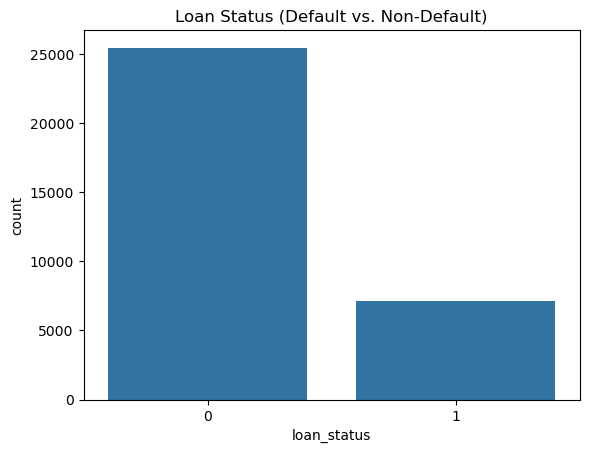

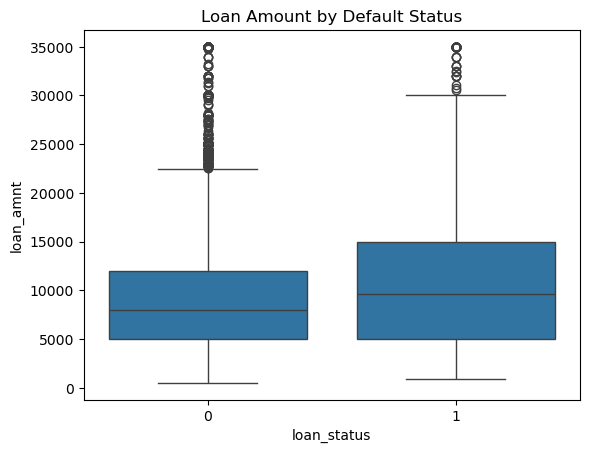

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status (Default vs. Non-Default)')
plt.show()
if 'loan_amnt' in df.columns:
    sns.boxplot(x='loan_status', y='loan_amnt', data=df)
    plt.title('Loan Amount by Default Status')
    plt.show()

**Insights:**
- The dataset is (likely) imbalanced- fewer defaults than non defaults.
- Applicants with higher loan amounts may have a higher tendency to default.

## Feature Engineering
We convert categorical features to numerical (dummy variables), drop unique IDs, and prepare features/target.


In [21]:
categorical = df.select_dtypes('object').columns.drop('loan_status', errors='ignore')
df = pd.get_dummies(df, columns=categorical, drop_first=True)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

## Train-Test Split
Split the data into training and testing sets for validation.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building Logistic Regression
Logistic Regression is commonly used for binary classification problems such as loan default prediction

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

## Model Evaluation
Evaluate model performance using precision, confusion matrix, and ROC-AUC score.

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5072
           1       0.74      0.45      0.56      1445

    accuracy                           0.84      6517
   macro avg       0.80      0.70      0.73      6517
weighted avg       0.83      0.84      0.83      6517

Confusion Matrix:
 [[4843  229]
 [ 788  657]]
ROC AUC: 0.7047607190027616


## Credit Risk Business Metrics
**Probability of Default (PD):** Likelihood that a given customer will default.
**Exposure at default (EAD):** Amount expose to loss if the customer defaults.
**Loss Given Default (LGD):** Fraction of exposure that would be lost.
**Expected Loss (EL):** \[EL= PD\times LGD\times EAD\]
These metrics help banks estimate and provision for credit risk.

In [36]:
#for example
PD = 0.08   # Probability of Default (8%)
EAD = 500000  # Exposure at Default (₹5,00,000)
LGD = 0.6   # loss Given Default (60%)

# Calculate Expected Loss (EL)
EL = PD * LGD * EAD

print(f"Expected Loss (EL) for this customer: ₹{EL:,.0f}")

Expected Loss (EL) for this customer: ₹24,000


### Example Table (for multiple customers)

In [39]:
import pandas as pd
data = {'Customer': ['Alice', 'Ravi', 'Priya', 'Amit'],'PD': [0.08, 0.12, 0.03, 0.15],'EAD': [500000, 200000, 100000, 400000],'LGD': [0.6, 0.7, 0.5, 0.8]}
df = pd.DataFrame(data)
df['EL'] = df['PD'] * df['EAD'] * df['LGD']
print(df[['Customer', 'EL']])

  Customer       EL
0    Alice  24000.0
1     Ravi  16800.0
2    Priya   1500.0
3     Amit  48000.0


## Challenges & Future Improvements
- The dataset is often imbalanced: try SMOTE or other oversampling techniques.
- Could add more features: Credit History, Late Payments, etc.
- Advance models (Random Forest, XGBoost) may improve accuracy.
- Real world deployment needs interpretability and fairness checks.

## About This Notebook
**Author:** Aryan Tyagi
**Location:** New Delhi, India
**Contact:** aryantyagi3011@gmail.com

## References
- [Kaggle: Credit Risk Datasets] (https://www.kaggle.com/datasets/laotse/credit-risk-dataset?resource=download)
- scikit-learn documentation
